In [2]:
from qiskit import QuantumCircuit,  execute, Aer, BasicAer
from qiskit.visualization import plot_histogram
import numpy as np
pi = np.pi

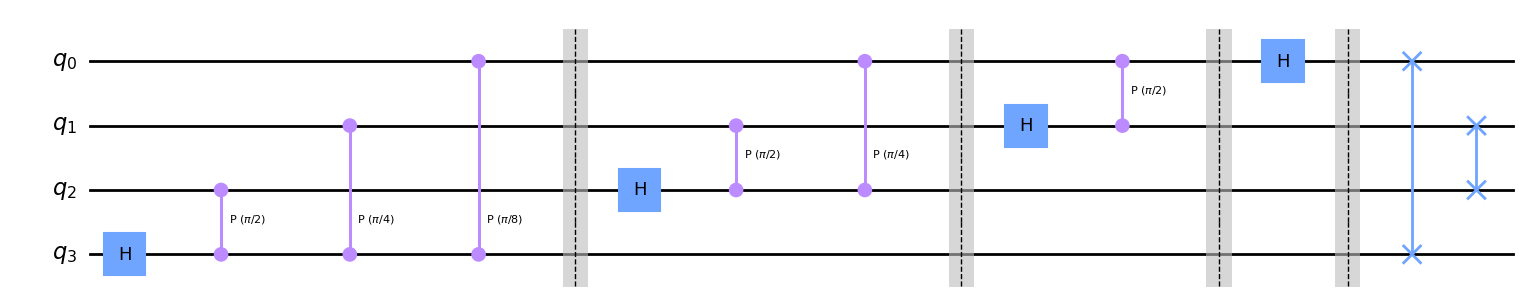

In [4]:
n=4 # number of qubits
qftn=QuantumCircuit(n,name='QFT')

for i in range(n-1,-1,-1): # i varies from n-1 to 0 with a decrement of 1
    qftn.h(i)
    p=0
    for j in range(i):
        p+=1
        qftn.cp(pi/(2**p),i-j-1,i) # controlled phase gates, control qubit is i-j-1
    qftn.barrier()

for i in range(int(n/2)):
    qftn.swap(i,n-1-i) # swap operation between i th and (n-1-i) th qubits

qftn.draw('mpl')

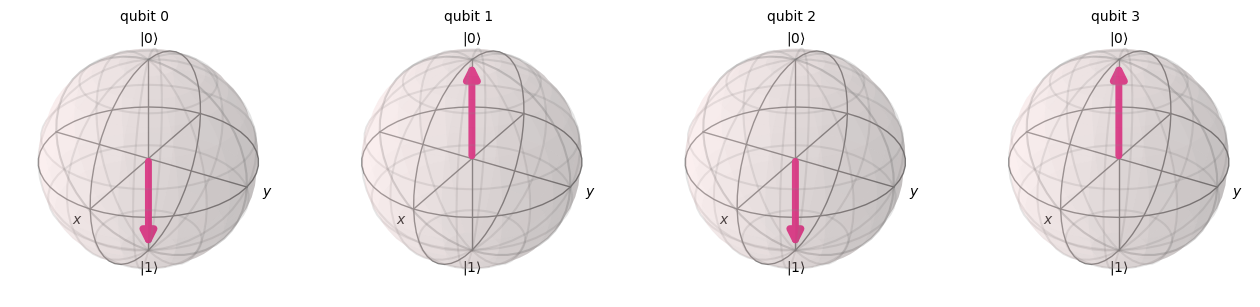

In [5]:
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('0101')
plot_bloch_multivector(sv)

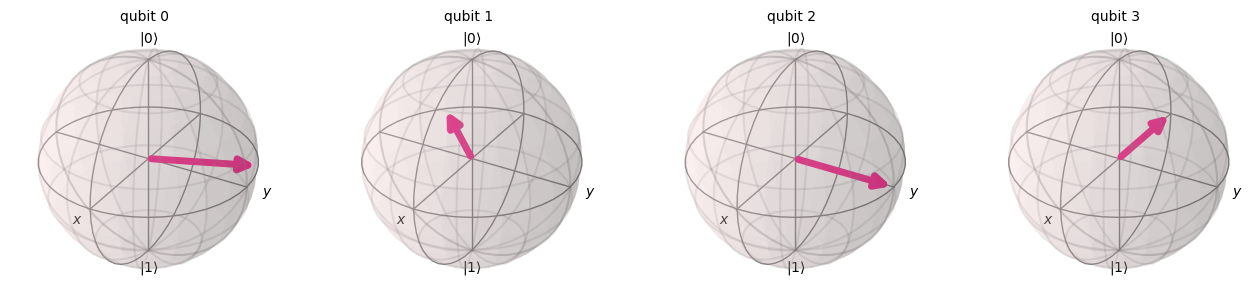

In [6]:
new_sv = sv.evolve(qftn)
plot_bloch_multivector(new_sv)

In [7]:
# all 4 qubits are in the xy plane, but their rotation is controlled by the qubit positions

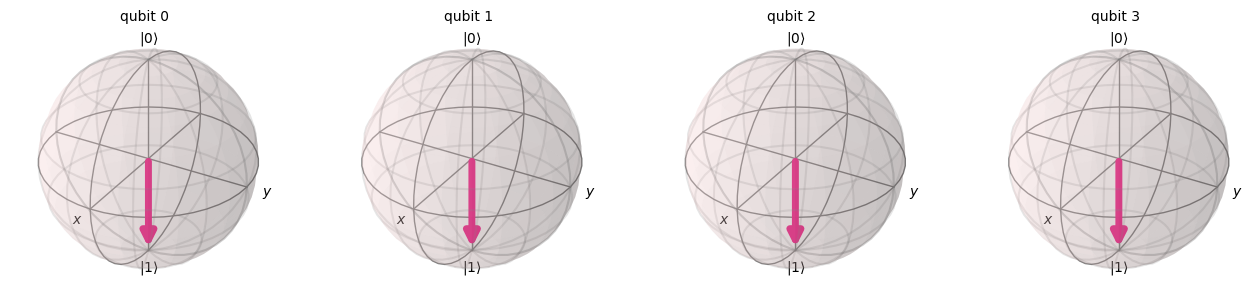

In [8]:
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('1111')
plot_bloch_multivector(sv)

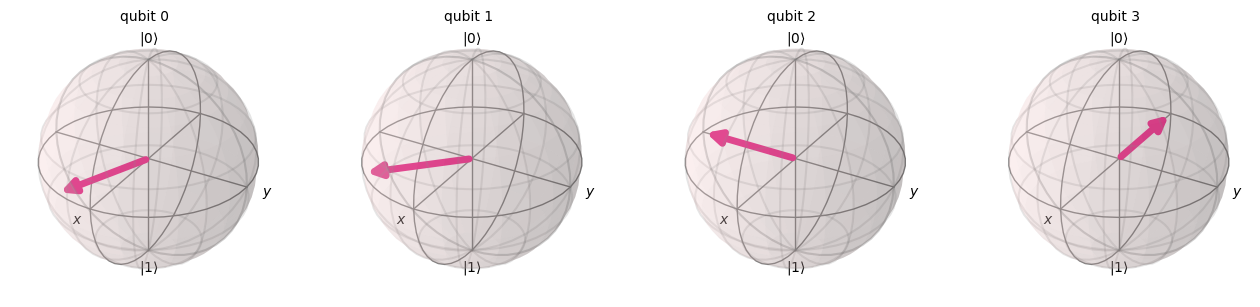

In [9]:
new_sv = sv.evolve(qftn)
plot_bloch_multivector(new_sv)

In [14]:
# qubit 3 is rotated by pi (it is in |-> state)
# qubit 2 is rotated by pi + pi/2
# qubit 1 is rotated by pi + pi/2 + pi/4
# qubit 0 is rotated by pi + pi/2 + pi/4 + pi/8

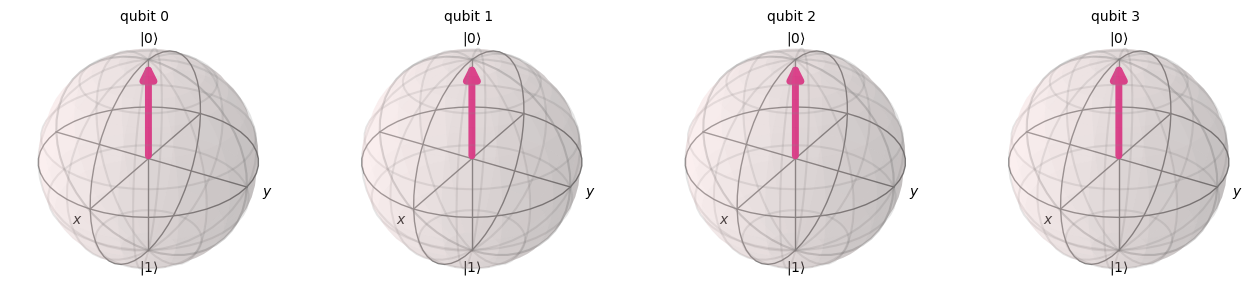

In [15]:
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('0000')
plot_bloch_multivector(sv)

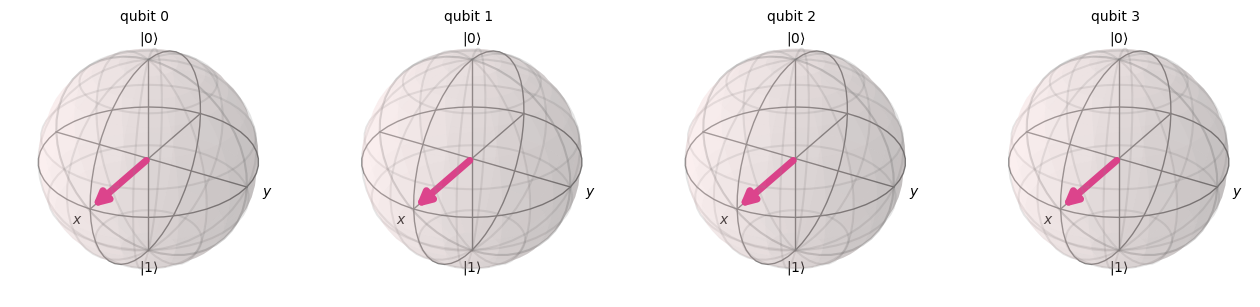

In [16]:
new_sv = sv.evolve(qftn)
plot_bloch_multivector(new_sv)

In [17]:
# all 4 qubits transform to |+> state

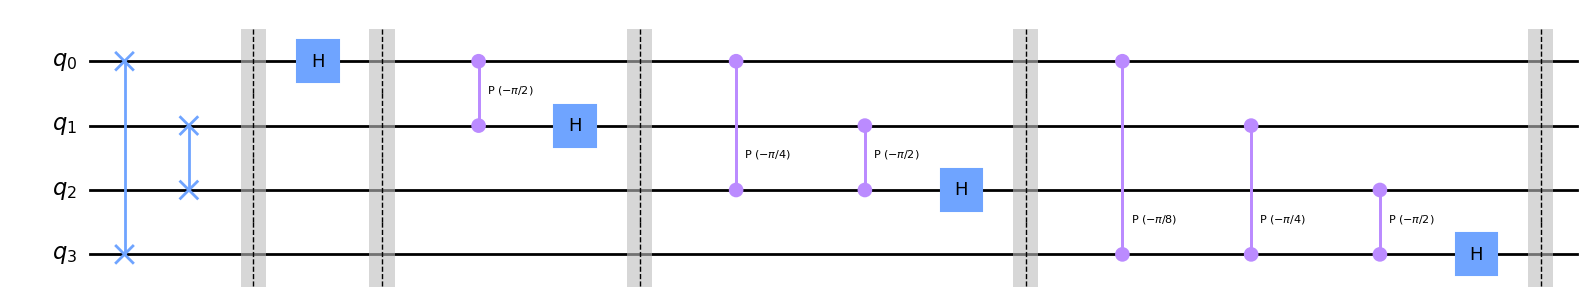

In [18]:
# INVERSE QFT

n=4
iqftn=QuantumCircuit(n,name='IQFT')

for i in range(int(n/2)):
    iqftn.swap(i,n-1-i)

iqftn.barrier()

for i in range(n):
    p=i+1
    for j in range(i):
        p-=1
        iqftn.cp(-pi/(2**p),j,i)
    iqftn.h(i)
    iqftn.barrier()

iqftn.draw('mpl')

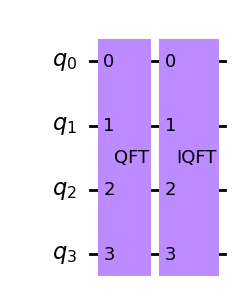

In [19]:
# verifying whether circuit works correctly by checking QFT . IQFT = Identity

n=4
identity=QuantumCircuit(n,name='QFT IQFT')
identity.append(qftn,range(n))
identity.append(iqftn,range(n))

identity.draw('mpl')

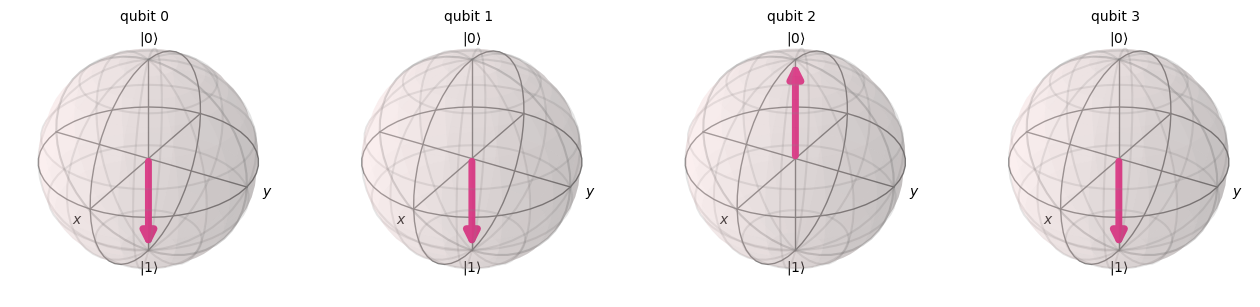

In [22]:
sv = Statevector.from_label('1011')
plot_bloch_multivector(sv)

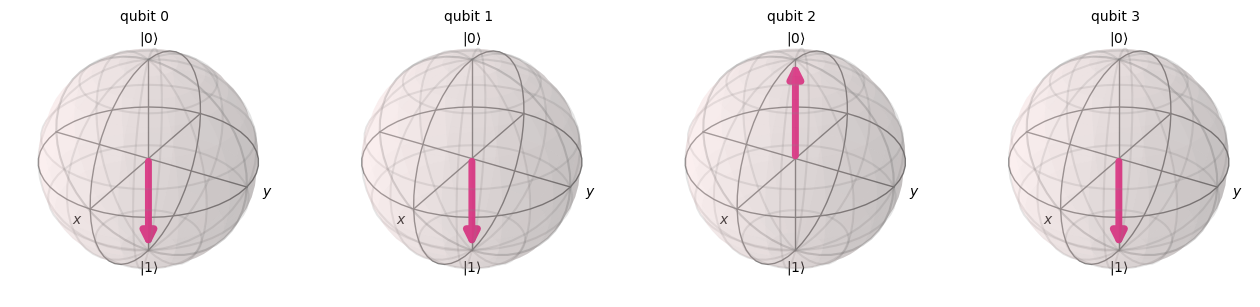

In [23]:
new_sv = sv.evolve(identity)
plot_bloch_multivector(new_sv)

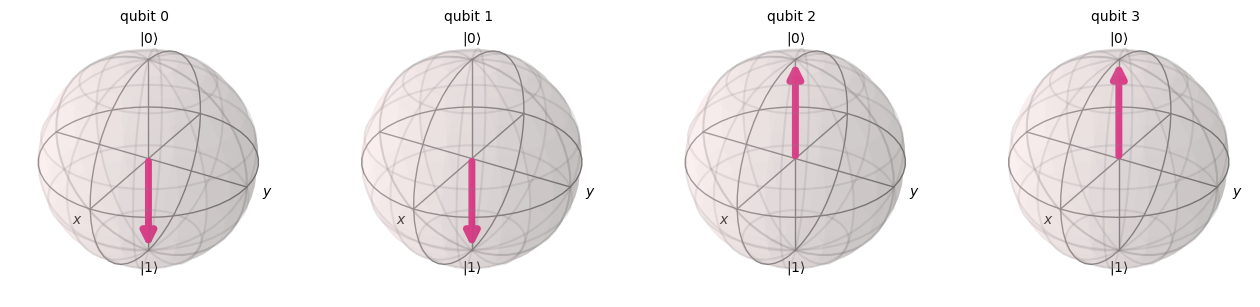

In [24]:
# Let us try to evolve using IQFT

sv = Statevector.from_label('0011')
plot_bloch_multivector(sv)

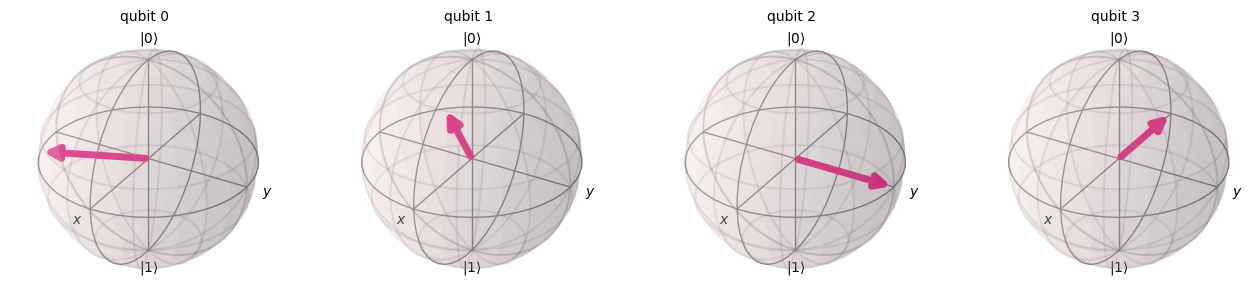

In [25]:
new_sv = sv.evolve(iqftn)
plot_bloch_multivector(new_sv)

In [26]:
# So IQFT also does similar thing as QFT
# it places qubits in xy plane with rotations of -ve phase as compared to QFT